## Select the Right Threshold values using ROC Curve

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# roc curve and auc score
from sklearn.datasets import make_classification

In [2]:
make_classification

<function sklearn.datasets._samples_generator.make_classification(n_samples=100, n_features=20, *, n_informative=2, n_redundant=2, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None, return_X_y=True)>

In [3]:
X , Y = make_classification(n_samples=1000, n_classes=2, weights=[1,1],random_state=1)

In [5]:
X.shape, Y

((1000, 20),
 array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
        1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
        1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
        1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
        1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
        1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
        0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 1,

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=1) 

In [ ]:
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve

## Random Forest

In [12]:
# Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train,Y_train)
Y_train_pred = rf_model.predict_proba(X_train)
print("RF Train roc-auc : {} ".format(roc_auc_score(Y_train, Y_train_pred[:,1])))

Y_test_pred = rf_model.predict_proba(X_test)

print("RF Test roc-auc : {} ".format(roc_auc_score(Y_test, Y_test_pred[:,1])))


RF Train roc-auc : 1.0 
RF Test roc-auc : 0.9538242110893208 


In [14]:
Y_test_pred.shape

(300, 2)

## Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression()
log_classifier.fit(X_train,Y_train)
Y_train_pred = log_classifier.predict_proba(X_train)
print("Logistic train roc-auc : {}".format(roc_auc_score(Y_train,Y_train_pred[:,1])))

Y_test_pred = log_classifier.predict_proba(X_test)
print("Logistic test roc-auc : {}".format(roc_auc_score(Y_test,Y_test_pred[:,1])))

Logistic train roc-auc : 0.9408089766518852
Logistic test roc-auc : 0.9548939204849349


## Adaboost Classifier

In [18]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier = AdaBoostClassifier()
ada_classifier.fit(X_train,Y_train)
Y_train_pred = ada_classifier.predict_proba(X_train)
print("Adaboost Train roc-auc : {}".format(roc_auc_score(Y_train,Y_train_pred[:,1])))

Y_test_pred = ada_classifier.predict_proba(X_test)
print("Adaboos Test roc-auc : {}".format(roc_auc_score(Y_test,Y_test_pred[:,1])))

Adaboost Train roc-auc : 0.9765212207331914
Adaboos Test roc-auc : 0.9529996434302015


In [25]:
Y_test_pred.shape

(300, 2)

## KNN Classifier

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train,Y_train)

Y_train_pred = knn_classifier.predict_proba(X_train)
print(" KNN train roc-auc : {}".format(roc_auc_score(Y_train, Y_train_pred[:,1])))

Y_test_pred = knn_classifier.predict_proba(X_test)
print(" KNN test roc-auc : {}".format(roc_auc_score(Y_test, Y_test_pred[:,1])))





 KNN train roc-auc : 0.962727948322186
 KNN test roc-auc : 0.9129746835443038


### Now we will focus on selecting the best threshold for maximun accuracy

In [29]:
pred = []
for model in [rf_model,log_classifier, ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))

final_prediction = pd.concat(pred, axis= 1).mean(axis = 1)
print("Ensemble test roc-auc : {}".format(roc_auc_score(Y_test,final_prediction)))



Ensemble test roc-auc : 0.9566767694776253


In [38]:
pd.concat(pred, axis =1)

,0,1,2,3
0,0.01,0.027681,0.252157,0.0
1,0.92,0.820825,0.580284,0.8
2,0.08,0.001760,0.286075,0.0
3,0.09,0.047084,0.340585,0.2
4,0.96,0.959973,0.680019,1.0
...,...,...,...,...
295,0.15,0.465867,0.422059,0.8
296,0.90,0.984676,0.660378,1.0
297,0.85,0.958161,0.631066,0.6
298,0.82,0.906868,0.567661,1.0


In [39]:
final_prediction

0      0.072459
1      0.780277
2      0.091959
3      0.169417
4      0.899998
         ...   
295    0.459482
296    0.886264
297    0.759807
298    0.823632
299    0.088857
Length: 300, dtype: float64

In [42]:
# Calculate the roc-auc curve

fpr, tpr, threshold = roc_curve(Y_test,final_prediction)
threshold

array([       inf, 0.90696844, 0.85297042, 0.85145133, 0.81686377,
       0.81620429, 0.79567552, 0.79423978, 0.78851397, 0.78685885,
       0.76647597, 0.76631624, 0.72030358, 0.71955342, 0.71936917,
       0.71784749, 0.7141823 , 0.7138458 , 0.65139279, 0.65117537,
       0.63941486, 0.63488132, 0.6278604 , 0.62064895, 0.61924963,
       0.6174637 , 0.61290113, 0.60794232, 0.60422676, 0.59959259,
       0.55989303, 0.55333384, 0.55159943, 0.54497656, 0.5374568 ,
       0.52475675, 0.50132807, 0.48915782, 0.48818391, 0.48547461,
       0.46872057, 0.37760725, 0.36374761, 0.36134795, 0.35286987,
       0.32569272, 0.31875139, 0.29361776, 0.28958922, 0.09822499,
       0.09820233, 0.06425251])

In [47]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in threshold:
    y_pred = np.where(final_prediction>thres, 1, 0)
    accuracy_ls.append(accuracy_score(Y_test,y_pred,normalize = True))

accuracy_ls = pd.concat([pd.Series(threshold),pd.Series(accuracy_ls)],axis = 1)
accuracy_ls.columns = ["threshold","Accuracy"]
accuracy_ls.sort_values(by ="Accuracy", ascending=False, inplace=True)
accuracy_ls.head()

,threshold,Accuracy
36,0.501328,0.906667
37,0.489158,0.906667
39,0.485475,0.906667
31,0.553334,0.906667
40,0.468721,0.906667


In [48]:

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

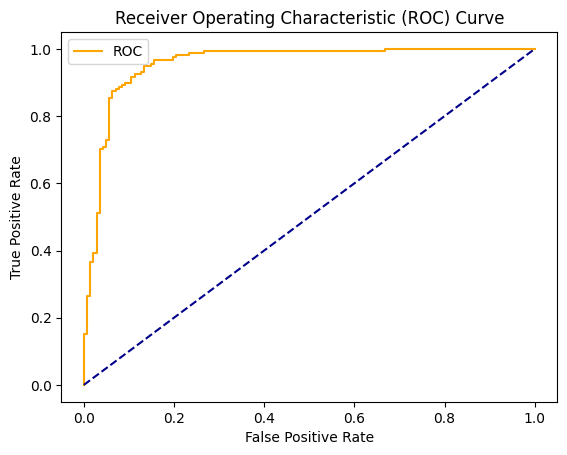

In [49]:

plot_roc_curve(fpr,tpr)